In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

2023-11-17 20:55:05.396315: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 20:55:05.768758: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 20:55:05.768807: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 20:55:05.771098: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 20:55:05.961486: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 20:55:05.963558: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
df = np.loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')

In [3]:
df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [4]:
df.shape

(768, 9)

In [5]:
x = df[:,:8]
y = df[:,8]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
print(f"x train shape{X_train.shape}")
print(f"y train shape{y_train.shape}")
print(f"x test shape{X_test.shape}")
print(f"y test shape{y_test.shape}")
print(f"x val shape{X_val.shape}")
print(f"y val shape{y_val.shape}")

x train shape(614, 8)
y train shape(614,)
x test shape(77, 8)
y test shape(77,)
x val shape(77, 8)
y val shape(77,)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [9]:
from collections import Counter
Counter(y)

Counter({0.0: 500, 1.0: 268})

In [10]:
import seaborn as sns

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential([

tf.keras.layers.InputLayer(8,),
Dense(50,activation='relu'),
    
Dense(50,activation='relu'),
Dense(50,activation='relu'),
Dense(50,activation='relu'),
    
Dense(1,activation='sigmoid')
])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8151 (31.84 KB)
Trainable params: 8151 (31.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
history = model.fit(x=x,y=y,epochs=25, batch_size=500,validation_data=(X_val,y_val))

Epoch 1/25
2/2 [==============================] - 3s 560ms/step - loss: 4.7566 - accuracy: 0.6497 - val_loss: 0.7053 - val_accuracy: 0.4675
Epoch 2/25
2/2 [==============================] - 0s 71ms/step - loss: 4.4460 - accuracy: 0.6497 - val_loss: 0.7055 - val_accuracy: 0.4416
Epoch 3/25
2/2 [==============================] - 0s 75ms/step - loss: 4.1319 - accuracy: 0.6497 - val_loss: 0.7056 - val_accuracy: 0.4156
Epoch 4/25
2/2 [==============================] - 0s 61ms/step - loss: 3.8220 - accuracy: 0.6484 - val_loss: 0.7058 - val_accuracy: 0.3766
Epoch 5/25
2/2 [==============================] - 0s 60ms/step - loss: 3.5174 - accuracy: 0.6484 - val_loss: 0.7061 - val_accuracy: 0.3896
Epoch 6/25
2/2 [==============================] - 0s 90ms/step - loss: 3.2287 - accuracy: 0.6484 - val_loss: 0.7064 - val_accuracy: 0.4026
Epoch 7/25
2/2 [==============================] - 0s 89ms/step - loss: 2.9491 - accuracy: 0.6471 - val_loss: 0.7067 - val_accuracy: 0.4026
Epoch 8/25
2/2 [==========

<AxesSubplot: >

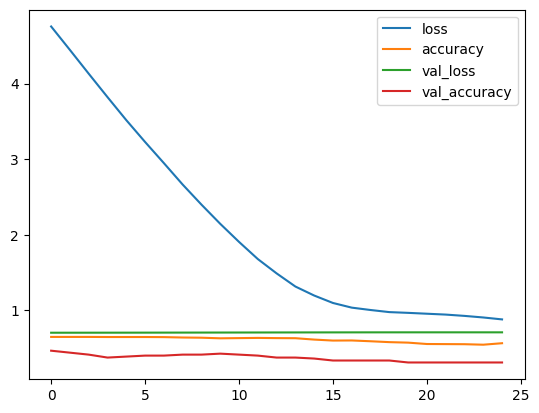

In [16]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [17]:
model.evaluate(x,y)

24/24 [==============================] - 0s 4ms/step - loss: 0.8597 - accuracy: 0.5820


[0.8596527576446533, 0.58203125]

In [18]:
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 0s 3ms/step


array([[0.494935  ],
       [0.51308304],
       [0.52088475],
       [0.49523118],
       [0.4999331 ],
       [0.48346314],
       [0.5354769 ],
       [0.5242056 ],
       [0.5059791 ],
       [0.52597   ],
       [0.4978975 ],
       [0.51300514],
       [0.5328447 ],
       [0.5086198 ],
       [0.51568747],
       [0.52221596],
       [0.5175017 ],
       [0.5319284 ],
       [0.5032121 ],
       [0.5090014 ],
       [0.53331995],
       [0.52361983],
       [0.5338337 ],
       [0.47021514],
       [0.5037454 ],
       [0.4697215 ],
       [0.51313406],
       [0.54595375],
       [0.5146206 ],
       [0.5061078 ],
       [0.5000466 ],
       [0.52528167],
       [0.53336626],
       [0.51730025],
       [0.52204907],
       [0.50588566],
       [0.5245883 ],
       [0.48240292],
       [0.5504828 ],
       [0.5348222 ],
       [0.5201847 ],
       [0.50747246],
       [0.52197397],
       [0.48711577],
       [0.5289168 ],
       [0.49874824],
       [0.53133476],
       [0.543